
# SIP Lab 3 : Discrete cosine transform, Introduction to JPEG.

### Basile Mouret, Malik Hacini

In [19]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

## Exercice 1


### Question 1

It is easy to see that for $0 \leq n < L$, we have

$$
f_n = \frac{\tilde{f_n} + \tilde{f}_{-n-1}}{2}
$$

We can write $\tilde{f_n}$ as its inverse Fourier transform:

$$
\tilde{f_n} = \frac{1}{2L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \, e^{2i k \pi \frac{n}{2L}}.
$$

Hence, we have

\begin{align*}
f_n &= \frac{1}{2} \left( \frac{1}{2L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \, e^{2i k \pi \frac{n}{2L}}
+ \frac{1}{2L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \, e^{2i k \pi \frac{-n - 1}{2L}} \right) \\
&= \frac{1}{4L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \left( e^{2i k \pi \frac{n}{2L}} + e^{-2i k \pi \frac{n + 1}{2L}} \right) \\
&= \frac{1}{4L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \left( e^{-i k \pi \frac{1}{2L}} \, e^{i k \pi \frac{n + 1}{2L}} + e^{-i k \pi \frac{1}{2L}} \, e^{-i k \pi \frac{n + 1}{2L}} \right) \\
&= \frac{1}{4L} \sum_{k=0}^{2L - 1} e^{-i k \pi \frac{1}{2L}} \, \hat{\tilde{f_k}} \cdot 2 \cos\!\Bigl( k \pi \frac{n + 1/2}{L} \Bigr) \\
&= \frac{1}{2L} \sum_{k=0}^{L - 1} e^{-i k \pi \frac{1}{2L}} \, \hat{\tilde{f_k}} \cos\!\Bigl( k \pi \frac{n + 1/2}{L} \Bigr)
+ \frac{1}{2L} \sum_{k=L}^{2L - 1} e^{-i k \pi \frac{1}{2L}} \, \hat{\tilde{f_k}} \cos\!\Bigl( k \pi \frac{n + 1/2}{L} \Bigr).
\end{align*}


We can now rewrite the second term using the index substitution $u = 2L - k \Rightarrow k = 2L - u$:

\begin{align*}
S_2 &= \frac{1}{2L} \sum_{u=1}^{L} e^{-i \, (2L - u)\pi \,/\, (2L)} \, \hat{\tilde{f}}_{2L -  u} \,
\cos\!\Bigl( (2L - u) \pi \frac{n + 1/2}{L} \Bigr) \\
&= \frac{1}{2L} \sum_{u=1}^{L} \left( - e^{i u \pi / (2L)} \right) \, \hat{\tilde{f}}_{2L -  u} \,
\cos\!\Bigl( u \pi \frac{n + 1/2}{L} \Bigr).
\end{align*}

We now notice that the term for $u = L$ vanishes thanks to the cosine. Adding the term for $u = 0$, we get

$$
S_2 = \frac{1}{2L} \Biggl( \hat{\tilde{f_0}} + \sum_{u=0}^{L - 1} \Bigl( - e^{i u \pi / (2L)} \Bigr) \hat{\tilde{f}}_{2L -  u} \,
\cos\!\Bigl( u \pi \frac{n + 1/2}{L} \Bigr) \Biggr).
$$

Then, plugging $S_2$ back into the expression for $f_n$, using
$\hat{\tilde{f_0}} = \hat{\tilde{f_0}} \cos\!\bigl(0 \cdot \pi \tfrac{n + 1/2}{L}\bigr)$
and combining the sums yields

$$
f_n = \sum_{k=0}^{L - 1} a_k \cos\!\Bigl( k \pi \frac{n + 1/2}{L} \Bigr)
\quad
a_k =
\begin{cases}
\dfrac{1}{2L} \, \hat{\tilde{f_0}}, & \text{for } k = 0, \\[6pt]
\dfrac{1}{2L} \bigl( e^{-i k \pi / (2L)} \, \hat{\tilde{f_k}} - e^{i k \pi / (2L)} \, \hat{\tilde{f}}_{2L - k} \bigr), & \text{for } 1\le k < L.
\end{cases}
$$

Using $\hat{\tilde{f}}_{2L - k} = \overline{\hat{\tilde{f_k}}}$, we finally get

$$
a_k =
\begin{cases}
\dfrac{1}{2L} \, \hat{\tilde{f_0}}, & \text{for } k = 0, \\[6pt]
\dfrac{i}{L} \,\Im\!\bigl( e^{-i k \pi / (2L)} \, \hat{\tilde{f_k}} \bigr), & \text{for }  1\le k < L .
\end{cases}
$$


### Question 2
We denote $e^{(n)} = (e_0, ..., e_{L-1})$ the considered family of $\mathbb{C}^L$. Let $k \in \{ 0, ..., L-1 \}$. We have
TODO : show norm = 1


Now let $p \neq q$. We have
$$
\begin{align}
\langle e_k, e_p \rangle &= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} cos(\frac{k \pi}L(n+\frac 12))cos(\frac{p \pi}L(n+\frac 12))\\
&= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} cos(\frac{(k+p) \pi}L(n+\frac 12))+cos(\frac{(k-p) \pi}L(n+\frac 12))\\

&= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}L(n+\frac 12))})+\Re(e^{i(\frac{(k-p) \pi}L(n+\frac 12))})\\

&= \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}{2L})}\sum_{n=0}^{L-1} e^{i(\frac{(k+p) \pi}Ln)} + e^{i(\frac{(k-p) \pi}{2L})}\sum_{n=0}^{L-1} e^{i(\frac{(k-p) \pi}Ln)})\\
&= \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}{2L})} \frac{1-e^{i((k+p)\pi}}{1-e^{\frac{i(k+p)\pi}L}}+e^{i(\frac{(k-p) \pi}{2L})} \frac{1-e^{i((k-p)\pi}}{1-e^{\frac{i(k-p)\pi}L}}).\\
\end{align}
$$
Then, $ \frac{e^{i\frac x2}}{1-e^{ix}} = \frac 1{e^{-i\frac x 2}+e^{i\frac x 2}} = i\frac 2{sin(\frac x 2)}$, hence
$$
\langle e_k, e_p \rangle = \frac{2\lambda_k\lambda_p}{L} \Re(i(\frac {1-e^{i((k+p)\pi}}{sin(\frac{(k+p) \pi}{2L})}+\frac {1-e^{i((k-p)\pi}}{sin(\frac{(k-p) \pi}{2L})})).
$$

When $k+p$ is even, $1-e^{i((k+p)\pi}=1-e^{i((k-p)\pi}=0$,
so $ \langle e_k, e_p \rangle = 0 $

When $k+p$ is odd, $1-e^{i((k+p)\pi}=1-e^{i((k-p)\pi}=2$ and $i(\frac {2}{sin(\frac{(k+p) \pi}{2L})}+\frac {2}{sin(\frac{(k-p) \pi}{2L})})$ is imaginary,
so $ \langle e_k, e_p \rangle = 0 $

Thus $e^{(n)}$ is an orthonormal basis of $\mathbb{C}^L$.

### Question 3

We denote $c_k^{(n)}$ the coefficients of $f_n$ in $e_n$, such that $$ f_n = \sum_{k=0}^{L-1} c_k^{(n)} \lambda_k \sqrt(\frac{2}{L}) \cos (\frac{k \pi}{L} (n + \frac{1}{2})).$$ By uniqueness of this decomposition, we deduct that 

$$ c_k^{(n)} \lambda_k \sqrt(\frac{2}{L}) \cos (\frac{k \pi}{L} (n + \frac{1}{2})) = a_k   \iff c_k^{(n)} = 
\begin{cases} 
\frac{1}{2 \sqrt{L}} \hat{\tilde f_0} & \text{if } k = 0, \\
\frac{1}{\sqrt{2L}} \mathfrak{I}(e^{-i \pi k / 2L}\hat{\tilde f_k}) & \text{if } 1 \leq k < L.

\end{cases}
 $$

### Question 4



In [20]:
def compute_ck(f):
    f = np.asarray(f)
    L = f.shape[0]

    tilde = np.empty(2 * L, dtype=complex)
    tilde[:L] = f
    tilde[L:] = f[::-1]

    fhat_tilde = np.fft.fft(tilde)  # length 2L

    ks = np.arange(1, L)                     
    theta = np.pi * ks / (2.0 * L)          
    exp_minus = np.exp(-1j * theta)         
    vals = exp_minus * fhat_tilde[ks]

    c = np.empty(L, dtype=float)
    c[0] = np.real(fhat_tilde[0]) / (2.0 * np.sqrt(L))
    c[1:] = (1.0 / np.sqrt(2.0 * L)) * np.real(vals)

    return c

def reconstruct_from_ck(c):

    L = len(c)
    n = np.arange(L)
    e0 = np.sqrt(1.0 / L) * np.ones(L)
    e = np.zeros((L, L), dtype=float)  
    e[0, :] = e0
    for k in range(1, L):
        e[k, :] = np.sqrt(2.0 / L) * np.cos( (k * np.pi * (n + 0.5)) / L )
    c_real = c.real
    f_recon = np.dot(c_real, e)

    return f_recon

### Question 5

Define the tensor-product basis of $\mathbb{C}^{L\times L}$ by
$$
E_{k,\ell}(n,m)\;:=\; e^{(k)}(n)\,e^{(\ell)}(m),
\qquad k,\ell=0,\dots,L-1,\; n,m=0,\dots,L-1.
$$

We use the Frobenius inner product on $\mathbb{C}^{L\times L}$:
$$
\langle A, C\rangle \;=\; \sum_{n=0}^{L-1}\sum_{m=0}^{L-1} A(n,m)\,\overline{C(n,m)}.
$$


For two tensor elements $E_{k,\ell}$ and $E_{p,q}$ we have
$$
\begin{aligned}
\langle E_{k,\ell},\,E_{p,q}\rangle
&= \sum_{n=0}^{L-1}\sum_{m=0}^{L-1} e^{(k)}(n)\,e^{(\ell)}(m)\,\overline{e^{(p)}(n)\,e^{(q)}(m)}\\[4pt]
&= \Big(\sum_{n=0}^{L-1} e^{(k)}(n)\,\overline{e^{(p)}(n)}\Big)\,
   \Big(\sum_{m=0}^{L-1} e^{(\ell)}(m)\,\overline{e^{(q)}(m)}\Big)\\[4pt]
&= \delta_{k,p}\,\delta_{\ell,q}
\end{aligned}
$$
because each $\{e^{(k)}\}_{k=0}^{L-1}$ is orthonormal in $\mathbb{C}^L$. Hence the family $\{E_{k,\ell}\}_{0\le k,\ell\le L-1}$ is orthonormal in $\mathbb{C}^{L\times L}$.


Any image $F\in\mathbb{C}^{L\times L}$ thus admits the expansion
$$
F(n,m) \;=\; \sum_{k=0}^{L-1}\sum_{\ell=0}^{L-1} C_{k,\ell}\,E_{k,\ell}(n,m)
\;=\; \sum_{k,\ell} C_{k,\ell}\, e^{(k)}(n)\,e^{(\ell)}(m)
$$
with coefficients given by
$$
C_{k,\ell} \;=\; \langle F,\,E_{k,\ell}\rangle
= \sum_{n=0}^{L-1}\sum_{m=0}^{L-1} F(n,m)\, e^{(k)}(n)\, e^{(\ell)}(m).
$$



## Exercice 2

### Question 1

Relative error: 0.15402105122317228


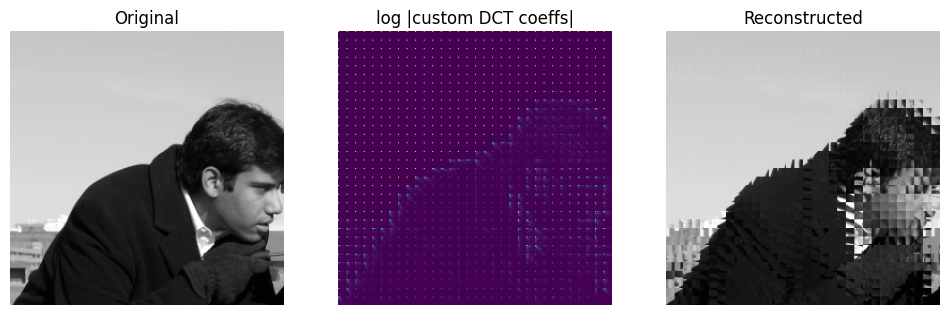

In [ ]:

def blockwise_dct2(image, block_size=8):
    H, W = image.shape

    blocks = image.reshape(H // block_size, block_size, W // block_size, block_size)
    blocks = blocks.transpose(0, 2, 1, 3)
    
    B1, B2, _, _ = blocks.shape
    blocks_flat = blocks.reshape(-1, block_size, block_size)  # (num_blocks, block_size, block_size)
    
    c_rows = np.array([compute_ck(row) for block in blocks_flat for row in block])
    c_rows = c_rows.reshape(blocks_flat.shape)
    
    c2 = np.array([compute_ck(col) for block in c_rows for col in block.T])
    c2 = c2.reshape(blocks_flat.shape)
    
    inv_cols = np.array([reconstruct_from_ck(col) for block in c2 for col in block.T])
    inv_cols = inv_cols.reshape(blocks_flat.shape[0], block_size, block_size).transpose(0,2,1)
    
    inv_block = np.array([reconstruct_from_ck(row) for block in inv_cols for row in block])
    inv_block = inv_block.reshape(blocks_flat.shape)
    
    coeffs = c2.reshape(B1, B2, block_size, block_size).transpose(0, 2, 1, 3).reshape(H, W)
    recon = inv_block.reshape(B1, B2, block_size, block_size).transpose(0, 2, 1, 3).reshape(H, W)
    
    return coeffs, recon

#Demo with cameraman image 
img = data.camera()
img = img_as_float(img)
img = img[:256, :256]
    
coeffs, recon = blockwise_dct2(img, block_size=8)
    
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title("Original")
    
plt.subplot(1,3,2)
plt.imshow(np.log1p(np.abs(coeffs)), cmap='viridis'); plt.axis('off'); plt.title("log |custom DCT coeffs|")
    
plt.subplot(1,3,3)
plt.imshow(recon, cmap='gray'); plt.axis('off'); plt.title("Reconstructed")
        
err = np.linalg.norm(recon - img) / np.linalg.norm(img)
print("Relative error:", err)



### Question 2

Je comprends pas sa question de merde

### Question 3

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

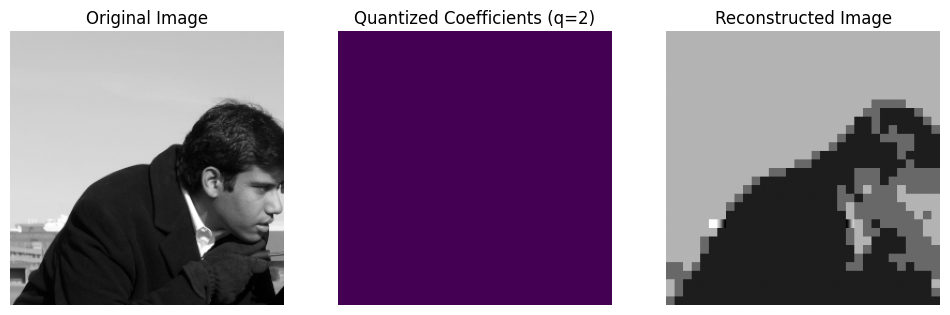

In [26]:
def quantize_block(block, q):
    
    Q = 1 + q * (np.add.outer(np.arange(8), np.arange(8)) + 1)
    quantized_block = np.round(block / Q)

    return quantized_block

# Parameters
block_size = 8
q = 2  # Quantization scaling factor
    
recon = np.zeros_like(img)
    
for i in range(0, img.shape[0], block_size):
    for j in range(0, img.shape[1], block_size):
            block = img[i:i+block_size, j:j+block_size]
            
            c = np.array([compute_ck(row) for row in block])
            c = np.array([compute_ck(col) for col in c.T]).T
            
            quantized_c = quantize_block(c, q)
            
            recon_block = np.array([reconstruct_from_ck(row) for row in quantized_c])
            recon_block = np.array([reconstruct_from_ck(col) for col in recon_block.T]).T
            
            recon[i:i+block_size, j:j+block_size] = recon_block
    
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
    
plt.subplot(1, 3, 2)
plt.imshow(np.log1p(np.abs(quantized_c)), cmap='viridis')
plt.title(f"Quantized Coefficients (q={q})")
plt.axis('off')
    
plt.subplot(1, 3, 3)
plt.imshow(recon, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

### Question 4

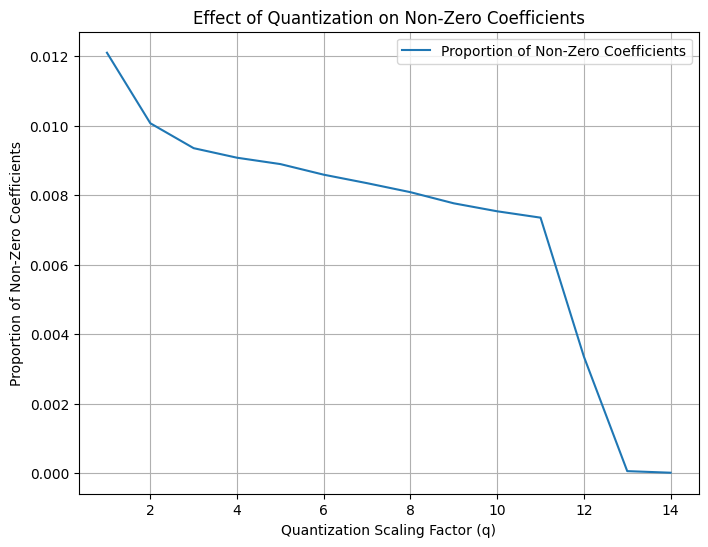

In [ ]:
def compute_non_zero_proportion(img, q_values, block_size=8):
    proportions = []
    
    for q in q_values:
        non_zero_count = 0
        total_count = 0
        
        for i in range(0, img.shape[0], block_size):
            for j in range(0, img.shape[1], block_size):
                block = img[i:i+block_size, j:j+block_size]
                
                c = np.array([compute_ck(row) for row in block])
                c = np.array([compute_ck(col) for col in c.T]).T
                
                quantized_c = quantize_block(c, q)
                
                non_zero_count += np.count_nonzero(quantized_c)
                total_count += quantized_c.size
        
        proportion = non_zero_count / total_count
        proportions.append(proportion)
    
    return proportions

q_values = np.arange(1, 15)

proportions = compute_non_zero_proportion(img, q_values)

plt.figure(figsize=(8, 6))
plt.plot(q_values, proportions, label='Proportion of Non-Zero Coefficients')
plt.xlabel('Quantization Scaling Factor (q)')
plt.ylabel('Proportion of Non-Zero Coefficients')
plt.title('Effect of Quantization on Non-Zero Coefficients')
plt.legend()


We notice that the proportion of non-zero coefficients is a decreasing function of $q$ that converges to $0$, which was to be expected. For our specific image, it basically drops to $0$ for $q > 10$. 

### Question 5

The DCT tends to concentrate most of the signal's energy in the lower-frequency components (top-left corner of the matrix). By scanning in a zig-zag pattern, these significant coefficients are placed at the beginning of the sequence. Afterwards, we get long sequences of zeros (low energy), that can thus be easily compressed since these sequences have very low entropy. Hence this choice of pattern : it optimizes well the compression ratio we can get via encoding.

However, zig-zag scanning is a heuristic and not an exact sort by energy, but it works very well in practice.